#  Introduction

The notebook implements a solution to the classification problem based on 'Geographical Original of Music' data set available under [this link](http://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music#).

The data set was created by Fang Zhou from The University of Nottinghan, Ningbo, China et consists of 1059 examples of audio features sets, each corresponding to a musical piece from one of 33 regions of the world. Each set is labeled with geographical coordinates of piece's country's of origin capital city.

The original solution to the problem, presented in Fang Zhou, Claire Q and Ross. D. King, Predicting the Geographical Origin of Music, ICDM, 2014 was based on a regression task. Following code implements a solution using classification methods.

In [1]:
import os
from six.moves import urllib
import pandas as pd
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
DOWNLOAD_ROOT = 'http://archive.ics.uci.edu/ml/machine-learning-databases/'
MUSIC_PATH = os.path.join('datasets', 'origins_of_music')
MUSIC_URL = DOWNLOAD_ROOT + '00315/Geographical%20Original%20of%20Music.zip'

def fetch_data(data_url, data_path, filename, is_zip = False):
    if  not os.path.isdir(data_path):
        os.makedirs(data_path)
    file_path = os.path.join(data_path, filename)
    urllib.request.urlretrieve(data_url, file_path)
    if is_zip:
        with zipfile.ZipFile(file_path) as current_zip:
            current_zip.extractall(data_path)

def load_data(data_path, filename, separator = ",", header = None):
    file_path = os.path.join(data_path, filename)
    return pd.read_csv(file_path, sep = separator, header = header)

In [61]:
fetch_data(MUSIC_URL, MUSIC_PATH, 'origin_of_music_data.zip', is_zip = True)
text_data_access = os.path.join('Geographical Original of Music', 'default_features_1059_tracks.txt')
music_raw = load_data(MUSIC_PATH, text_data_access)

column_names = [str(x) for x in range(68)]
column_names.append('latitude')
column_names.append('longitude')

music_raw.columns = column_names
music_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,latitude,longitude
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [82]:
music_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 70 columns):
0            1059 non-null float64
1            1059 non-null float64
2            1059 non-null float64
3            1059 non-null float64
4            1059 non-null float64
5            1059 non-null float64
6            1059 non-null float64
7            1059 non-null float64
8            1059 non-null float64
9            1059 non-null float64
10           1059 non-null float64
11           1059 non-null float64
12           1059 non-null float64
13           1059 non-null float64
14           1059 non-null float64
15           1059 non-null float64
16           1059 non-null float64
17           1059 non-null float64
18           1059 non-null float64
19           1059 non-null float64
20           1059 non-null float64
21           1059 non-null float64
22           1059 non-null float64
23           1059 non-null float64
24           1059 non-null float64
25           1059 

In [83]:
music_raw.describe()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,latitude,longitude
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,...,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,-0.019312,-0.021095,-0.029824,-0.041360,0.025364,0.003521,-0.021183,0.010021,-0.030965,-0.017495,...,0.025828,0.019925,0.025629,0.021065,0.027439,0.019795,0.023401,0.022533,26.651294,38.405656
std,0.987911,0.986098,0.972813,0.984577,0.999363,1.000305,0.989127,1.007714,1.007447,1.017138,...,1.012146,1.009817,1.008802,1.000416,1.000374,1.003078,1.011060,1.007017,18.459432,50.419790
min,-1.529463,-1.476560,-1.133667,-3.222673,-3.386389,-4.366687,-4.291933,-5.287408,-5.281537,-6.856486,...,-1.597512,-1.579654,-1.614369,-1.505952,-1.404766,-1.248702,-1.221595,-1.329595,-35.300000,-88.760000
25%,-0.607617,-0.621808,-0.599230,-0.640634,-0.599677,-0.633760,-0.608229,-0.556419,-0.513522,-0.464189,...,-0.668874,-0.680484,-0.692833,-0.660134,-0.693410,-0.652468,-0.641316,-0.658826,14.660000,3.210000
50%,-0.184135,-0.211257,-0.301310,-0.134986,0.157396,0.011760,0.037887,0.042447,0.074414,0.091507,...,-0.207786,-0.203502,-0.182283,-0.191193,-0.237980,-0.252907,-0.315654,-0.304111,33.660000,32.830000
75%,0.312155,0.310377,0.158689,0.459267,0.735870,0.662538,0.643826,0.574328,0.583657,0.569681,...,0.466648,0.485808,0.488015,0.476027,0.486942,0.326699,0.415290,0.352652,39.910000,74.600000
max,9.439499,10.719304,6.157847,5.926862,2.280230,2.897006,2.720127,3.127494,3.948652,3.492393,...,7.397255,5.336838,8.329566,5.854703,5.442332,6.437855,5.387364,5.977184,54.680000,149.120000


The data set is complete (there are no missing values) and consists of 67 audio features represented by 64-bit floating point numbers. 

The visualization of labels corresponding to data unveils the quantized character of geographical distribution of music's places of origin. This fact is the reason for choosing a classification approach to the problem. As the next step, latitude and longitude labels were transformed into string labels containing countries' names.

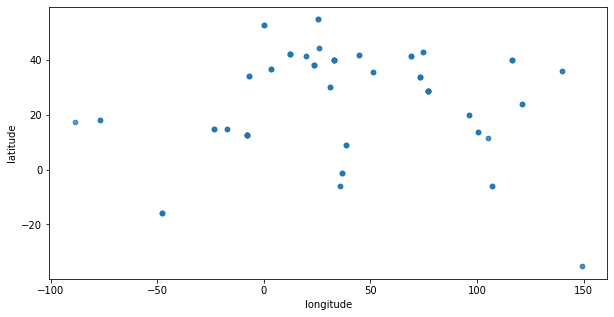

In [84]:
music_raw.plot(kind = "scatter", x = "longitude", y = "latitude", figsize = (10, 5), alpha = 0.1)

In [85]:
categories = {}
for coords in zip(music_raw['latitude'], music_raw['longitude']):
    if coords in categories:
        categories[coords] += 1
    else:
        categories[coords] = 1

for coordinate, num in categories.items():
    print(coordinate, ' - ', num)

(-15.75, -47.95)  -  36
(14.91, -23.51)  -  34
(12.65, -8.0)  -  66
(9.03, 38.74)  -  30
(34.03, -6.85)  -  33
(14.66, -17.41)  -  24
(52.5, -0.12)  -  33
(41.26, 69.21)  -  36
(41.9, 12.48)  -  51
(28.61, 77.2)  -  69
(33.66, 73.16)  -  47
(54.68, 25.31)  -  32
(44.41, 26.1)  -  19
(36.7, 3.21)  -  35
(39.91, 32.83)  -  64
(19.75, 96.1)  -  25
(13.75, 100.48)  -  27
(39.91, 116.38)  -  40
(23.76, 121.0)  -  25
(-6.17, 106.82)  -  25
(17.98, -76.8)  -  22
(35.68, 51.41)  -  23
(30.03, 31.21)  -  31
(42.86, 74.6)  -  26
(-1.26, 36.8)  -  32
(17.25, -88.76)  -  11
(38.0, 23.71)  -  46
(-35.3, 149.12)  -  14
(35.7, 139.71)  -  19
(-6.17, 35.74)  -  20
(41.71, 44.78)  -  29
(11.55, 104.91)  -  14
(41.33, 19.8)  -  21


In [86]:
label_text = { (-15.75, -47.95) : 'Brasil', (14.91, -23.51) : 'Cape Verde', (12.65, -8.0) : 'Mali',
               (9.03, 38.74) : 'Ethiopia', (34.03, -6.85) : 'Morocco', (14.66, -17.41) : 'Senegal',
               (52.5, -0.12) : 'England', (41.26, 69.21) : 'Uzbekistan', (41.9, 12.48) : 'Italy',
               (28.61, 77.2) : 'India', (33.66, 73.16) : 'Pakistan', (54.68, 25.31) : 'Lithunia',
               (44.41, 26.1) : 'Romania', (36.7, 3.21) : 'Algeria', (39.91, 32.83) : 'Turkey',
               (19.75, 96.1) : 'Myanmar', (13.75, 100.48) : 'Thailand', (39.91, 116.38) : 'China',
               (23.76, 121.0) : 'Taiwan', (-6.17, 106.82) : 'Indonesia', (17.98, -76.8) : 'Jamaica',
               (35.68, 51.41) : 'Iran', (30.03, 31.21) : 'Egypt', (42.86, 74.6) : 'Kyrgyzstan',
               (-1.26, 36.8) : 'Kenya', (17.25, -88.76) : 'Belize', (38.0, 23.71) : 'Greece',
               (-35.3, 149.12) : 'Australia', (35.7, 139.71) : 'Japan', (-6.17, 35.74) : 'Tanzania',
               (41.71, 44.78) : 'Georgia', (11.55, 104.91) : 'Cambodia', (41.33, 19.8) : 'Albania'
             } 

In [87]:
music_labeled = music_raw.copy()
music_labeled['country'] = list(zip(music_labeled['latitude'], music_labeled['longitude']))
music_labeled['country'] = music_labeled['country'].map(label_text)
music_labeled.drop(labels = ['latitude', 'longitude'], axis = 1, inplace = True)

music_labeled.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,country
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,Brasil
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,Cape Verde
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,Mali
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,Ethiopia
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,Morocco


In [88]:
music_labeled['country'].value_counts()

India         69
Mali          66
Turkey        64
Italy         51
Pakistan      47
Greece        46
China         40
Brasil        36
Uzbekistan    36
Algeria       35
Cape Verde    34
Morocco       33
England       33
Lithunia      32
Kenya         32
Egypt         31
Ethiopia      30
Georgia       29
Thailand      27
Kyrgyzstan    26
Myanmar       25
Indonesia     25
Taiwan        25
Senegal       24
Iran          23
Jamaica       22
Albania       21
Tanzania      20
Romania       19
Japan         19
Australia     14
Cambodia      14
Belize        11
Name: country, dtype: int64

The data is split into training set and test set using StratifiedShuffleSplit method from scikit-learn module in order to ensure equal distribution of musical pieces' countries of origin in both sets. Training set is then standarized. 

In [89]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(music_labeled, music_labeled['country']):
    strat_train_set = music_labeled.loc[train_index]
    strat_test_set = music_labeled.loc[test_index]

In [90]:
(music_labeled['country'].value_counts() / len(music_labeled)).head()

India       0.065156
Mali        0.062323
Turkey      0.060434
Italy       0.048159
Pakistan    0.044381
Name: country, dtype: float64

In [91]:
(strat_train_set['country'].value_counts() / len(strat_train_set)).head()

India       0.064935
Mali        0.062574
Turkey      0.060213
Italy       0.048406
Pakistan    0.043684
Name: country, dtype: float64

In [92]:
music = strat_train_set.copy()

targets = music['country']
data = music.drop('country', axis = 1)

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data = data_scaled[:,:],
                           index = None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4a1172f28>,
      dtype=object)

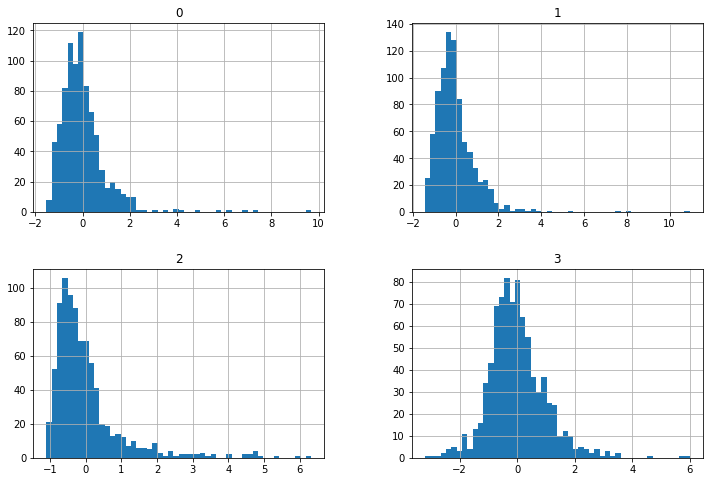

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

data_scaled.hist(bins = 50, column = [0, 1, 2, 3], figsize = (12, 8))

# The 'Geographical Accuracy' metric

Data processed in the way presented above is ready to be used in classification algorithms. In the original solution, the authors managed to achieve a mean great circle distance error of 3 113 km with the best performing algorithm. Thus, the task of correctly assigning the capital city to the musical piece seems to be to rigid to produce satisfactory results as far as accuracy metric is concerned. With this in mind, a custom 'geographical accuracy' metric was designed to examine the predictions not in a binary manner (True / False assignment), but rather as an evaluation of algorithm's decisions using geographical and cultural similarities and differences between countries.

To achieve that, 33 countries were split into 9 groups of size 2-6. The division was conducted based on a) the locations of countries, b) the cultural roots and history of the region which may have had an impact on the development of local music. Within each group, every pair of countries was assigned a score in a 0-1 range to further model their mutual cultural similarity. With this mechanism, a false assignment was not immediately discunted in the final accuracy score, but was instead rated: every prediction falling into the same 'bin' with the true label would be assigned a score, always higher than 0 and less than 1. The cumulative sum of scores divided by the number of examples would produce a total final outcome between 0 and 1.

The countries sharing no similarities with others were treated as a seperate bin. In their cases, false predictions would always produce the score of 0.

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
import numpy as np

region1 = ('Cape Verde', 'Mali', 'Morocco', 'Senegal', 'Algeria')
region2 = ('Ethiopia', 'Egypt', 'Kenya', 'Tanzania')
region3 = ('England', 'Italy', 'Lithuania')
region4 = ('Romania', 'Turkey', 'Greece', 'Georgia', 'Albania')
region5 = ('Myanmar', 'Thailand', 'China', 'Taiwan', 'Indonesia', 'Cambodia')
region6 = ('Uzbekistan', 'Kyrgyzstan')
region7 = ('Pakistan', 'Iran')
region8 = ('Jamaica', 'Belize')
remaining_locations = ('Brazil', 'India', 'Australia', 'Japan')

region1_scores = np.array([[1, 0.3, 0.2, 0.3, 0.2],
                           [0.3, 1, 0.5, 0.8, 0.7],
                           [0.2, 0.5, 1, 0.4, 0.8],
                           [0.3, 0.8, 0.4, 1, 0.5],
                           [0.2, 0.7, 0.8, 0.5, 1]])
region2_scores = np.array([[1, 0.2, 0.7, 0.6],
                           [0.2, 1, 0.2, 0.2],
                           [0.7, 0.2, 1, 0.7],
                           [0.6, 0.2, 0.7, 1]])
region3_scores = np.array([[1, 0.5, 0.7],
                           [0.5, 1, 0.4],
                           [0.7, 0.4, 1]])
region4_scores = np.array([[1, 0.7, 0.7, 0.4, 0.7],
                           [0.7, 1, 0.8, 0.6, 0.6],
                           [0.7, 0.8, 1, 0.5, 0.8],
                           [0.4, 0.6, 0.5, 1, 0.5],
                           [0.7, 0.6, 0.8, 0.5, 1]])
region5_scores = np.array([[1, 0.8, 0.7, 0.6, 0.6, 0.8],
                           [0.8, 1, 0.7, 0.6, 0.7, 0.9],
                           [0.7, 0.7, 1, 0.9, 0.6, 0.6],
                           [0.6, 0.6, 0.9, 1, 0.5, 0.6],
                           [0.6, 0.7, 0.6, 0.5, 1, 0.7],
                           [0.8, 0.9, 0.6, 0.6, 0.7, 1]])
region6_scores = np.array([[1, 0.9],
                           [0.9, 1]])
region7_scores = np.array([[1, 0.8],
                           [0.8, 1]])
region8_scores = np.array([[1, 0.8],
                           [0.8, 1]])
remaining_locations_scores = np.identity(4)

regions = { region1 : region1_scores, region2 : region2_scores, region3 : region3_scores,
            region4 : region4_scores, region5 : region5_scores, region6 : region6_scores,
            region7 : region7_scores, region8 : region8_scores, remaining_locations : remaining_locations_scores }


def geographical_accuracy(estimator, X, y):
    estimator.fit(X, y)
    estimated_labels = estimator.predict(X)
    result_sum = 0
    
    for estimation in zip(y, estimated_labels):
        for region in regions:    
            if set(estimation).issubset(set(region)):
                scores_tab_in_use = regions[region]
                row = region.index(estimation[0])
                column = region.index(estimation[1])
                result_sum += scores_tab_in_use[row][column]
    return result_sum / len(y)
                

Five classification algorithms were tested to choose the one producing the highest geographical accuracy score. The algorithms were: stochastic gradient descent classifier, linear support vector classifier, logistic regression classifier, extra-trees classifier and random forest classifier. Exhaustive grid search was then applied to the highest scoring method in order to find the optimal parameters.

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)

cross_val_score(sgd_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.87632509, 0.90957447, 0.91134752])

In [26]:
from sklearn.svm import LinearSVC

svc_clf = LinearSVC(penalty = 'l2', C = 1, loss = 'squared_hinge', dual = False)

cross_val_score(svc_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.93286219, 0.93971631, 0.92907801])

In [27]:
from sklearn.linear_model import LogisticRegression

softmax_clf = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')

cross_val_score(softmax_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.92932862, 0.93971631, 0.92553191])

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier()

cross_val_score(ext_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.93286219, 0.93971631, 0.93262411])

In [97]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

cross_val_score(forest_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.93286219, 0.93971631, 0.93262411])

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators' : [10, 100, 500], 'max_features' : [2, 10, 40, 60],
               'bootstrap' : [True, False] }

grid_search = GridSearchCV(forest_clf, param_grid, cv = 3, scoring = geographical_accuracy)
grid_search.fit(data_scaled, targets)

cv_res = grid_search.cv_results_

for accuracy, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(accuracy, params)

0.9322348361443167 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
0.9350675387815452 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.9350675387815452 {'bootstrap': True, 'max_features': 2, 'n_estimators': 500}
0.932471242763702 {'bootstrap': True, 'max_features': 10, 'n_estimators': 10}
0.9350675387815452 {'bootstrap': True, 'max_features': 10, 'n_estimators': 100}
0.9350675387815452 {'bootstrap': True, 'max_features': 10, 'n_estimators': 500}
0.9277472871713907 {'bootstrap': True, 'max_features': 40, 'n_estimators': 10}
0.9350675387815452 {'bootstrap': True, 'max_features': 40, 'n_estimators': 100}
0.9350675387815452 {'bootstrap': True, 'max_features': 40, 'n_estimators': 500}
0.9312933864621707 {'bootstrap': True, 'max_features': 60, 'n_estimators': 10}
0.9350675387815452 {'bootstrap': True, 'max_features': 60, 'n_estimators': 100}
0.9350675387815452 {'bootstrap': True, 'max_features': 60, 'n_estimators': 500}
0.9350675387815452 {'bootstrap': False, 'max_fea

In [99]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
final_model = grid_search.best_estimator_

music_test = strat_test_set.copy()
targets_test = music_test['country']
data_test = music_test.drop('country', axis = 1)

data_test_scaled = scaler.transform(data_test)

data_test_scaled = pd.DataFrame(data = data_test_scaled[:,:],
                                index = None)

test_set_predictions = final_model.predict(data_test_scaled)

geographical_accuracy(final_model, data_test_scaled, test_set_predictions)

0.9245283018867925

Finally, the optimized random forest classifier was used on the test set. 

###  The algoritm produced a geographical accuracy score of almost 92.5% for the test set and 93.5% for the training set. 

More in-depth tuning of the accuracy metric and more extensive grid search for the algorithm could improve the final results, which are nevertheless very satisfactory.